In [1]:
import pandas as pd

PATH="UCI HAR\\data\\UCI HAR Dataset"
#y_data = pd.read_csv(PATH+"\\train\\y_train.txt",sep=' ')   
har_features = pd.read_csv(PATH+"\\features.txt",sep=' ',names=['id','features'])
har_labels = pd.read_csv(PATH+"\\activity_labels.txt",sep=' ',names=['id','labels'])

#np.unique(har_features.features,return_counts=True)

X_train = pd.read_csv(PATH+"\\train\\X_train.txt",sep='\s+',header=None)
y_train = pd.read_csv(PATH+"\\train\\y_train.txt",sep="\s+",names=['labels'])

X_test = pd.read_csv(PATH+"\\test\\X_test.txt",sep='\s+',header=None)
y_test = pd.read_csv(PATH+"\\test\\y_test.txt",sep="\s+",names=['labels'])

har_data_train = pd.concat([X_train,y_train],axis=1)
har_data_samples = har_data_train.sample(frac=0.3)
har_data_samples

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,labels
3125,0.278591,-0.019896,-0.104628,-0.997068,-0.993332,-0.981060,-0.997115,-0.992925,-0.979727,-0.939358,...,-0.775561,-0.964759,-0.149966,-0.240572,0.150582,-0.375015,-0.851878,0.138362,-0.081239,4
3972,0.281904,-0.014107,-0.108353,-0.994936,-0.984915,-0.986297,-0.995715,-0.984285,-0.988098,-0.938348,...,-0.574366,-0.838405,-0.131150,-0.627706,-0.897099,-0.783737,-0.652798,0.299635,0.149794,5
3348,0.269258,-0.053617,-0.112253,-0.488392,-0.089720,-0.332164,-0.515509,-0.140462,-0.314557,-0.208735,...,0.104009,-0.357999,0.019170,0.679631,-0.892597,0.670482,-0.742551,0.131018,0.201002,1
5483,0.278011,-0.022790,-0.116604,-0.988249,-0.923275,-0.929554,-0.990703,-0.923969,-0.925930,-0.926174,...,-0.399993,-0.787235,0.004753,-0.073967,0.285117,0.628315,-0.853566,0.155416,-0.069780,5
4064,0.271121,-0.019741,-0.102950,-0.977492,-0.981294,-0.965573,-0.977417,-0.981771,-0.961792,-0.925730,...,-0.672941,-0.884025,-0.012556,-0.335311,-0.369767,0.440403,0.332460,-0.389741,-0.574672,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,0.224104,-0.070152,-0.160533,-0.345152,0.143162,-0.430728,-0.381578,0.116751,-0.441590,-0.014248,...,-0.187194,-0.574562,0.124450,0.621094,-0.884986,-0.631605,-0.761025,0.249104,-0.051070,1
3844,0.281658,-0.019777,-0.119736,-0.991694,-0.987277,-0.967370,-0.991632,-0.985592,-0.963340,-0.935280,...,-0.692215,-0.908622,0.044050,-0.459598,0.287177,0.507401,-0.691042,-0.069913,-0.121747,4
1747,0.139646,-0.021323,-0.082665,-0.229222,0.293903,-0.028488,-0.289455,0.261607,0.010845,-0.213079,...,-0.625431,-0.912435,0.724824,0.447974,-0.466031,-0.131627,-0.710041,0.298114,0.030142,2
4181,0.270117,-0.022320,-0.091740,-0.947517,-0.880690,-0.892255,-0.958978,-0.889904,-0.885034,-0.865321,...,-0.040588,-0.464141,0.170933,-0.210367,-0.141653,-0.208046,-0.609400,0.328069,0.159682,5


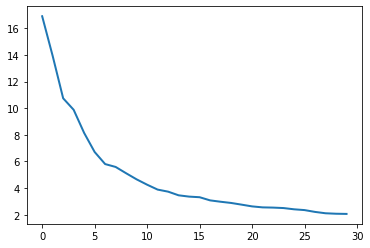

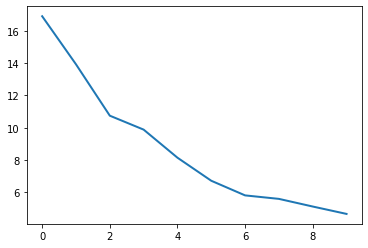

In [113]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing      import StandardScaler
from sklearn.decomposition      import PCA

X_samples=har_data_samples[har_data_samples.columns.difference(['labels'])]
y_samples=har_data_samples['labels']
scale = StandardScaler().fit_transform(X_samples)
pca = PCA(n_components=561)
#pca = pca.fit(x_samples)
pca = pca.fit(scale)
#print(pca.explained_variance_)
rank = np.sort(pca.explained_variance_)[::-1]
#print(rank)
#sns.lineplot(range(0,560),pca.explained_variance_[1:],linewidth=2)
#plt.show()
sns.lineplot(range(0,30),rank[2:32],linewidth=2)
plt.show()
sns.lineplot(range(0,10),rank[2:12],linewidth=2)
plt.show()

In [115]:
from sklearn.pipeline           import Pipeline
from sklearn.preprocessing      import StandardScaler
from sklearn.decomposition      import PCA, NMF
from sklearn.feature_selection  import SelectKBest, chi2
from sklearn.svm                import SVC
from sklearn.linear_model       import LogisticRegression
from sklearn.ensemble           import RandomForestClassifier
from sklearn.model_selection    import GridSearchCV

pipeline = Pipeline([
    ("scale"          , StandardScaler()),
    ("pca"            , PCA()),
    ("classifier"     , SVC())
])

N_FEATURES  = [6, 8, 10]
C_PARMS     = [0.001, 0.01, 0.1, 1, 10, 100]
GAMMA_PARMS = [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = [
    {
        'pca__n_components'  : N_FEATURES,
        'classifier'        : [SVC(random_state=0)],
        'classifier__C'     : C_PARMS,
        'classifier__gamma' : GAMMA_PARMS
    },
    {
        'pca__n_components'  : N_FEATURES,
        'classifier'         : [RandomForestClassifier(random_state=0)],
        'classifier__n_estimators' : C_PARMS
    },
    {
        'pca__n_components'  : N_FEATURES,
        'classifier'    : [ LogisticRegression(random_state=0)],
        'classifier__C' : C_PARMS
    }
]

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-2)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             n_jobs=-2,
             param_grid=[{'classifier': [SVC(random_state=0)],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'pca__n_components': [6, 8, 10]},
                         {'classifier': [RandomForestClassifier(random_state=0)],
                          'classifier__n_estimators': [0.001, 0.01, 0.1, 1, 10,
                                                       100],
                          'pca__n_components': [6, 8, 10]},
                         {'classifier': [LogisticRegression(C=0.1,
                                                            random_state=0)],
                          'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'pc

In [117]:
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier': LogisticRegression(C=0.1, random_state=0), 'classifier__C': 0.1, 'pca__n_components': 10}

Best cross-validation score: 0.84
Test-set score: 0.84


In [124]:
result_data = pd.DataFrame(grid.cv_results_)
result_data[(result_data.rank_test_score <=3)]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__gamma,param_pca__n_components,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
56,1.130798,0.018379,0.794000,0.019717,SVC(random_state=0),1,0.001,10,NaN,"{'classifier': SVC(random_state=0), 'classifie...",0.834126,0.828008,0.826531,0.807483,0.878912,0.835012,0.023693,2
134,1.442801,0.126499,0.042199,0.008751,"LogisticRegression(C=0.1, random_state=0)",0.1,NaN,10,NaN,"{'classifier': LogisticRegression(C=0.1, rando...",0.840925,0.798776,0.830612,0.806122,0.899320,0.835151,0.035601,1
143,1.172013,0.137788,0.028393,0.004417,"LogisticRegression(C=0.1, random_state=0)",100,NaN,10,NaN,"{'classifier': LogisticRegression(C=0.1, rando...",0.841604,0.793338,0.823129,0.803401,0.900680,0.832431,0.037946,3


[[477   5  13   0   1   0]
 [ 22 429  20   0   0   0]
 [ 40  69 311   0   0   0]
 [  0   1   0 321 167   2]
 [  0   0   0  82 448   2]
 [  0   0   0  41   0 496]]


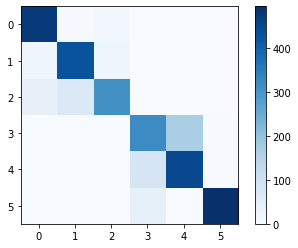

In [130]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = grid.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

plt.figure()
plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
plt.colorbar()

print(cm)
plt.show()